In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")

In [8]:
from project.utils.ds.dataset import BoxedExamplesDataset, transform_chain
from pathlib import Path
from project.utils.ds import transforms as tr
from project.utils.ds.images import is_grayscale
import numpy as np
from torchvision.transforms import Compose
from project.utils.ds.dataset import transform_chain

In [4]:
train_path = Path("../data/stage1_train/")
ds = BoxedExamplesDataset.from_path(train_path, transform = Compose(transform_chain))

670it [01:55,  5.82it/s]


In [54]:
from project.utils.ds import transforms as tr
from project.utils.ds import random_transforms as rnd

transform_chain = [
    tr.to_grayscale,
    tr.flip_color_on_intensity_heuristic,
    tr.max_pixel_to_255,
    rnd.random_transform(tr.rotate, rnd.rotate_90_sampler()),
    rnd.random_transform(tr.rotate, rnd.rotate_sampler(amplitude=15)),
    tr.resize_to_min_300,
    rnd.random_transform(tr.crop, rnd.constant_crop_size_sampler(crop_size=256/300)),
    # tr.to_tensors_tuple
]

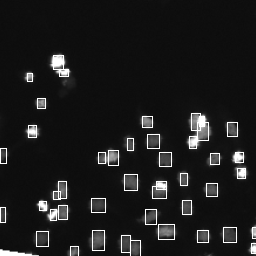

In [67]:
ds.transform = Compose(transform_chain)

ds[10].vis_boxes(1)